# Advanced Tyre Wear Analysis

This notebook uses the `AdvancedTyreWearModel` class to simulate and analyse tyre wear dynamics over a race distance. It incorporates:
- Tyre compounds with unique properties (soft, medium, hard).
- Temperature effects on grip and degradation.
- Energy loss due to rolling resistance and cornering forces.
- Lap-by-lap grip degradation analysis.

We will visualise:
1. Grip levels over laps.
2. Tyre temperature dynamics.
3. Energy loss trends.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.wear_simulation import TyreWearModel, simulate_advanced_tyre_wear


In [4]:
# Simulation parameters
laps = 50
compound = "medium"
track_roughness = 1.2
temperature_effect = 0.005

# Run the simulation
simulation_results = simulate_advanced_tyre_wear(
    laps=laps,
    compound=compound,
    track_roughness=track_roughness,
    temperature_effect=temperature_effect
)

# Display the first few rows of the results
simulation_results.head()


,Lap,Grip,Temperature,Energy Loss (kJ)
0,1,0.650542,27,7.857882
1,2,0.641325,29,10.661195
2,3,0.636418,31,7.550432
3,4,0.628912,33,8.851284
4,5,0.625066,35,6.201916


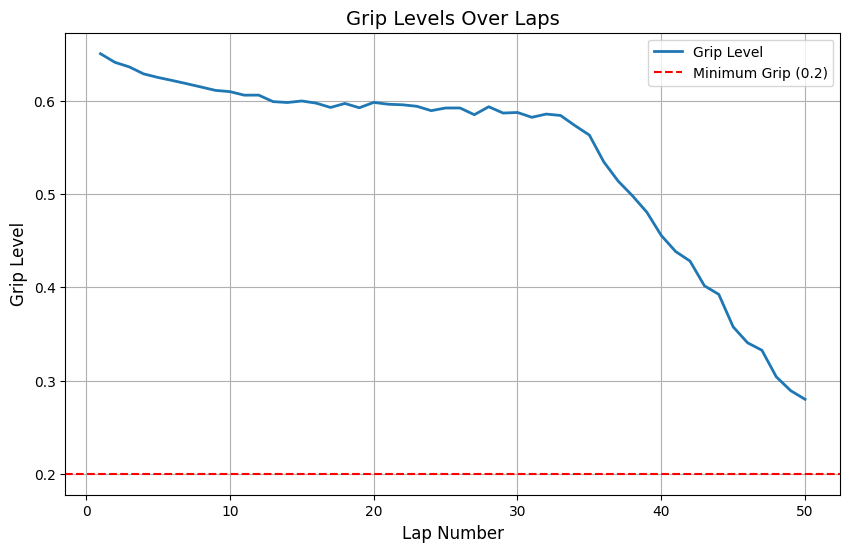

In [5]:
# Plot grip levels over laps
plt.figure(figsize=(10, 6))
plt.plot(simulation_results["Lap"], simulation_results["Grip"], label="Grip Level", linewidth=2)
plt.axhline(y=0.2, color="r", linestyle="--", label="Minimum Grip (0.2)")
plt.title("Grip Levels Over Laps", fontsize=14)
plt.xlabel("Lap Number", fontsize=12)
plt.ylabel("Grip Level", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


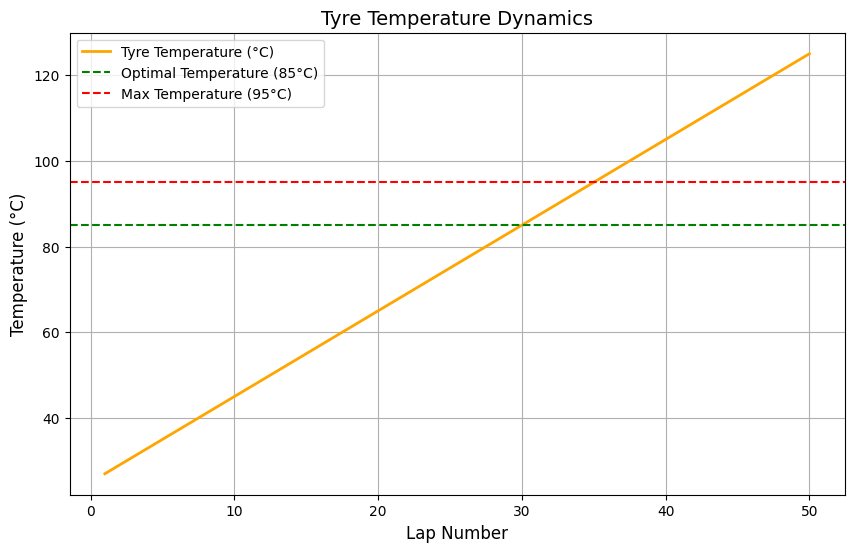

In [6]:
# Plot tyre temperature over laps
plt.figure(figsize=(10, 6))
plt.plot(simulation_results["Lap"], simulation_results["Temperature"], label="Tyre Temperature (°C)", color="orange", linewidth=2)
plt.axhline(y=85, color="g", linestyle="--", label="Optimal Temperature (85°C)")
plt.axhline(y=95, color="r", linestyle="--", label="Max Temperature (95°C)")
plt.title("Tyre Temperature Dynamics", fontsize=14)
plt.xlabel("Lap Number", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


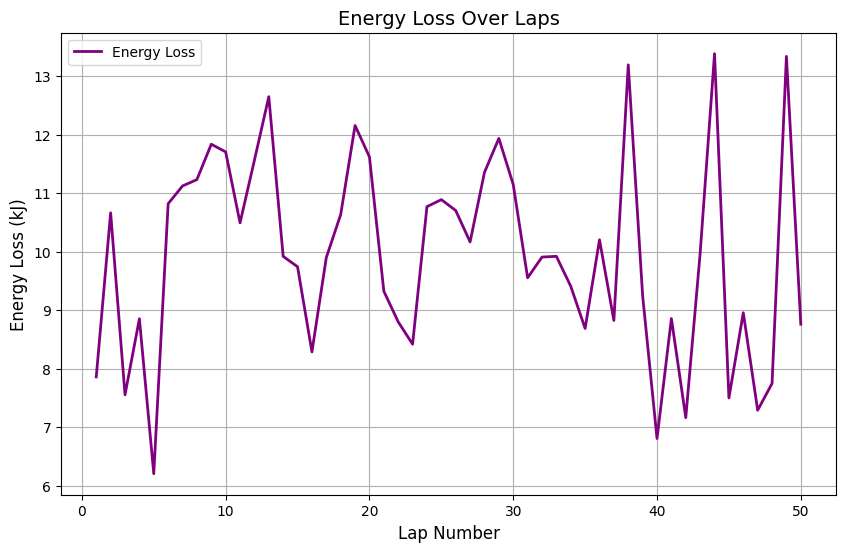

In [7]:
# Plot energy loss over laps
plt.figure(figsize=(10, 6))
plt.plot(simulation_results["Lap"], simulation_results["Energy Loss (kJ)"], label="Energy Loss", color="purple", linewidth=2)
plt.title("Energy Loss Over Laps", fontsize=14)
plt.xlabel("Lap Number", fontsize=12)
plt.ylabel("Energy Loss (kJ)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


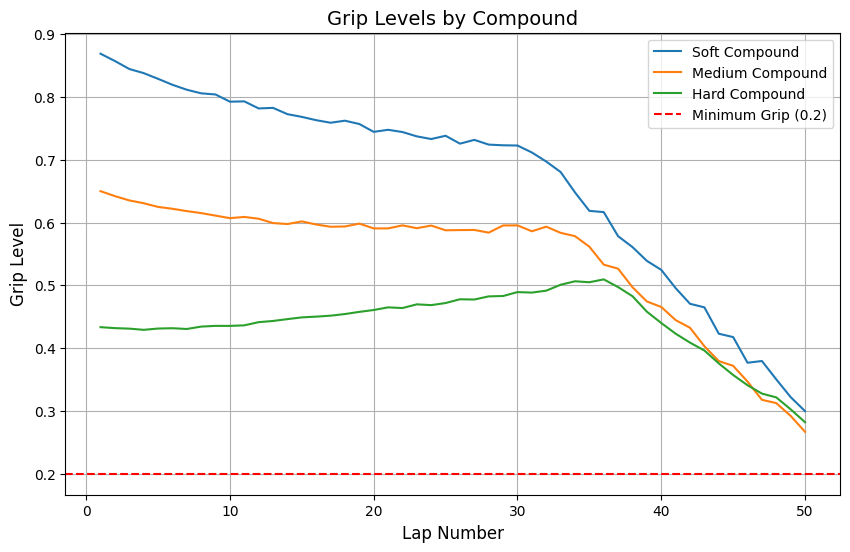

In [8]:
# Simulate for different compounds
compounds = ["soft", "medium", "hard"]
compound_results = {}

for comp in compounds:
    compound_results[comp] = simulate_advanced_tyre_wear(
        laps=laps,
        compound=comp,
        track_roughness=track_roughness,
        temperature_effect=temperature_effect
    )

# Plot comparison of grip levels
plt.figure(figsize=(10, 6))
for comp, results in compound_results.items():
    plt.plot(results["Lap"], results["Grip"], label=f"{comp.capitalize()} Compound")

plt.axhline(y=0.2, color="r", linestyle="--", label="Minimum Grip (0.2)")
plt.title("Grip Levels by Compound", fontsize=14)
plt.xlabel("Lap Number", fontsize=12)
plt.ylabel("Grip Level", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

This analysis demonstrates the advanced capabilities of the tyre wear model:
1. **Grip Trends**: Different compounds degrade at varying rates.
2. **Temperature Effects**: Tyre temperature plays a significant role in performance.
3. **Energy Loss**: Rolling resistance and cornering forces contribute to tyre energy dissipation.

These insights can be used to optimise race strategies and improve vehicle performance.